Wat het onderzoek zou moeten opleveren, denk ik:

1. Twee (of vier) lijsten van meest gebruikte ‘linkse’ en ‘rechtse’ worden – gerankt
2. Een lijst van favoriete woorden per partij: het ‘CDA-woord’, het ‘D66-woord’ etc.
3. een lijst van ambigue woorden – populair bij links én rechts

*De woorden van links*

* Afbraak
* Gelijkheid
* Solidariteit
* Samen
* Collectief
* Sociaal
* Beschermen
* Neoliberalisme
* Amerikaanse toestanden
* Tweedeling
* Kloof
* Ongelijkheid
* Integreren/integratie
* Preventie
* Kansen (en ook kans?? Vragen)
* Verbinding/-en
* Perspectief
* Eerlijk delen
* Verheffen
* Nivelleren


*De woorden van rechts*

* Vrijheid
* Potverteren
* Kleine overheid
* Fatsoen
* Belasting(en)
* Ondernemen(d)/-ers
* (Keihard) Aanpakken
* Opsluiten
* Achter slot en grendel
* Joods-christelijke cultuur/Leitkultur/traditie
* Islamisering
* Daders
* Veiligheid
* Slachtoffer(s)
* Individu
* Eigen verantwoordelijkheid
* Soeverein(iteit)


**Partijen**

*Sociaal-economisch links*

* SP
* GroenLinks
* PvdA
* PVV
* ChristenUnie
* Partij voor de Dieren
* Denk (= groep Kuzu-Öztürk)

*Sociaal-economisch rechts*

* PVV
* VVD
* CDA
* SGP
* 50Plus

*Sociaal-cultureel links*

* SP
* GroenLinks
* PvdA
* Partij voor de Dieren
* D66

*Sociaal-cultureel rechts*

* PVV
* ChristenUnie
* VVD
* CDA
* SGP
* 50Plus
* Denk (= groep Kuzu-Öztürk)



http://search.politicalmashup.nl/
* 01-01-2006 - 01-01-2016
* mp
* commons



Kleine overheid moeten we ff kijken of dat goed gaat 

In [1]:
import csv
import re

global parties
parties = {}

# Telt momenteel in hoeveel speeches het woord gezegd wordt
def getData(word):
    # Get the amount of speeches the word is used in from a csv file
    with open(word + ".csv") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            # Correct party name if necessary
            # Some parties start with EP/, remove that
            party = re.sub('EP/', '', row["party"])
            if party in parties:
                if word in parties[party]:
                    parties[party][word] += 1
                else:
                    # New word
                    parties[party][word] = 1
            else:
                # New party
                newWord = {word: 1}
                parties[party] = newWord
            
# To do sommige woorden combinerend zoeken?
allLeftWords = ['afbraak', 'gelijkheid', 'solidariteit', 'samen', 'collectief', 'sociaal', 'beschermen', 
                 'neoliberalisme', 'amerikaanse toestanden', 'tweedeling', 'kloof', 'ongelijkheid', 
                 'integr(eren|atie)', 'preventie', 'kansen', 'verbinding(en)', 'perspectief', 
                 'eerlijk delen', 'verheffen', 'nivelleren']
allRightWords = ['vrijheid', 'potverteren', 'kleine overheid', 'fatsoen', 'belasting(en)', 'ondernemen(d)-ers', 
                 'keihard aanpakken', 'aanpakken', 'opsluiten', 'achter slot en grendel', 'leitkulturEtc', 
                 'islamisering', 'daders', 'veiligheid', 'slachtoffer(s)', 'individu', 'eigen verantwoordelijkheid',
                 'soeverein(iteit)']

for leftWord in allLeftWords:
    getData(leftWord)
for rightWord in allRightWords:
    getData(rightWord)
# getData('afbraak')
# getData('gelijkheid')
# getData('vrijheid')
parties

# Er zitten nu ook partijen met EP/*partij*, dus dit moeten we ff filteren denk

{'50PLUS': {'aanpakken': 23,
  'afbraak': 6,
  'belasting(en)': 41,
  'beschermen': 4,
  'collectief': 2,
  'eerlijk delen': 6,
  'eigen verantwoordelijkheid': 4,
  'gelijkheid': 1,
  'individu': 2,
  'integr(eren|atie)': 3,
  'kansen': 21,
  'kloof': 7,
  'leitkulturEtc': 1,
  'ondernemen(d)-ers': 31,
  'ongelijkheid': 4,
  'perspectief': 25,
  'potverteren': 1,
  'preventie': 15,
  'samen': 46,
  'slachtoffer(s)': 12,
  'sociaal': 52,
  'soeverein(iteit)': 1,
  'solidariteit': 7,
  'tweedeling': 4,
  'veiligheid': 36,
  'verbinding(en)': 2,
  'vrijheid': 11},
 '50PLUS/Baay-Timmerman': {'aanpakken': 1,
  'belasting(en)': 1,
  'eigen verantwoordelijkheid': 1,
  'kansen': 1,
  'perspectief': 2,
  'sociaal': 1,
  'veiligheid': 1},
 '50PLUS/Klein': {'aanpakken': 2,
  'belasting(en)': 3,
  'eigen verantwoordelijkheid': 2,
  'integr(eren|atie)': 1,
  'kansen': 1,
  'leitkulturEtc': 1,
  'ondernemen(d)-ers': 1,
  'perspectief': 3,
  'samen': 2,
  'slachtoffer(s)': 1,
  'sociaal': 2,
  'veili

In [2]:
len(parties)

36

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# to do: wordt later allRightWords, allLeftWords
def makeGraph(words, counts, allColors, allParties, wordSort):
    fig, ax = plt.subplots()
    n_groups = len(allParties)
    index = np.arange(len(words))
    bar_width = 1.0/(n_groups + 2)
    opacity = 0.8 
    
    for i in range(len(allParties)):
        plt.bar(index + bar_width*i, counts[i], bar_width, alpha=opacity, color=allColors[i], 
                label=allParties[i])
        
    plt.xlabel('Woord')
    plt.ylabel('Aantal keer genoemd')
    plt.title('Aantal keer dat ' + wordSort + ' woorden zijn genoemd over de periode 2006-2016 per partij')
    plt.xticks(index + 0.75, words)
    plt.legend()
    plt.tight_layout()
    plt.show()

def calculateCountsParty(parties, words):
    allParties = list(parties.keys())
    allCounts = []
    for party in allParties:
        counts = []
        partyDict = parties[party]
        for word in words:
            if word in partyDict.keys():
                counts.append(partyDict[word])
            else:
                counts.append(0)
        allCounts.append(tuple(counts))
    return allCounts
    

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


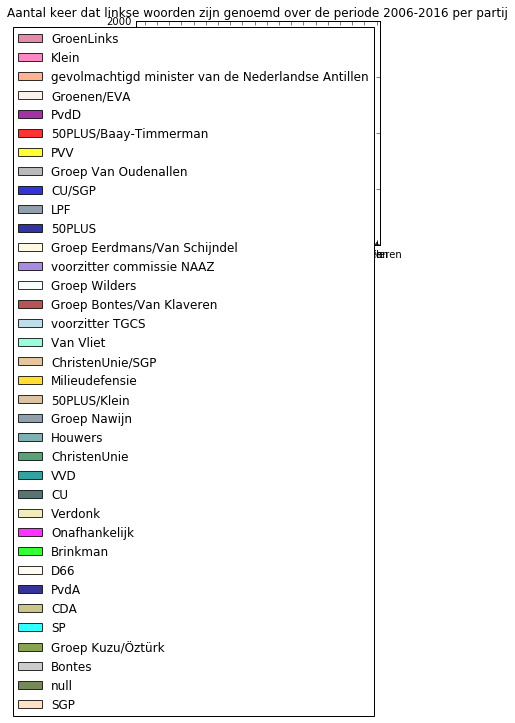

In [7]:
import matplotlib.colors as colors

allColors = list(colors.cnames.keys())
counts = calculateCountsParty(parties, allLeftWords)
makeGraph(allLeftWords, counts, allColors, list(parties.keys()), 'linkse')

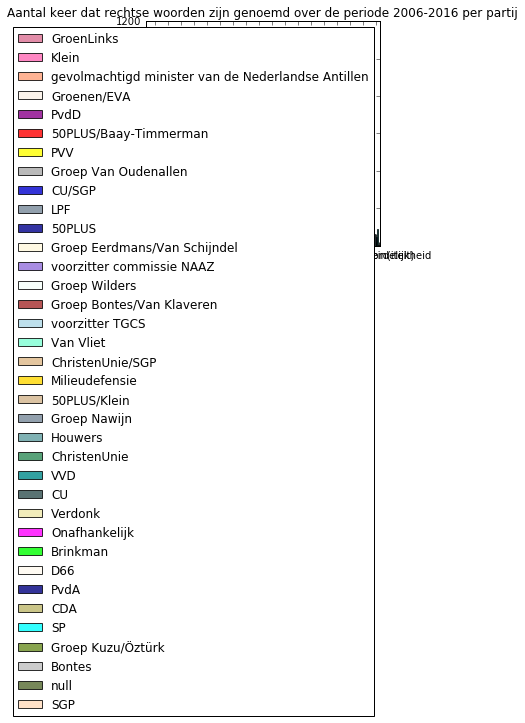

In [8]:
counts = calculateCountsParty(parties, allRightWords)
makeGraph(allRightWords, counts, allColors, list(parties.keys()), 'rechtse')